___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="600" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo.

**Nombres:** Francisco Javier Gonzalez Lazalde.

**Fecha:** 15 de mayo de 2025.

**Expediente** : 744576.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Pacolaz/Proyecto_MPST.git

# Proyecto Final

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# 📘 Proyecto Final — Modelado No Lineal de Series de Tiempo

## 🎯 Objetivo general

Desarrollar un proyecto aplicado de modelado de series de tiempo que integre los tres temas principales del curso: construcción de modelos de pronóstico, aplicación de modelos neuronales, y clasificación de series de tiempo. El proyecto debe demostrar habilidades prácticas en la selección, implementación y evaluación de modelos tanto lineales como no lineales, así como una interpretación adecuada de los resultados obtenidos.

---

## 🧩 Requisitos del proyecto

El proyecto debe cumplir con las siguientes especificaciones:

### 1. Análisis y pronóstico de series de tiempo

- Seleccionar una base de datos con al menos una serie de tiempo univariada (se sugiere además considerar variables adicionales para generar un enfoque multivariado que se usará posteriormente).
- Aplicar un modelo de pronóstico **lineal clásico** (por ejemplo, SARIMAX) **solo para el caso univariado**. Recuerda usar y argumentar todo el análisis que debe ser realizado para este tipo de modelos.
- Evaluar el desempeño del modelo lineal como línea base (Usar métricas como MAPE, MSE y $R^2$).

### 2. Modelos neuronales para series de tiempo

- Desarrollar e implementar los siguientes modelos para el pronóstico de la serie:
  - **Multilayer Perceptron (MLP)**
  - **Convolutional Neural Network (CNN)**
  - **Long Short-Term Memory (LSTM)**
  - **Conv-LSTM**

- Implementar cada uno de los modelos anteriores **tanto para el caso univariado como multivariado**.
- Comparar el desempeño de los modelos neuronales **univariados vs. multivariados**.
- Comparar el desempeño de los modelos neuronales **univariados** con el modelo **lineal clásico**. Crear gráficas donde se evidencie la predicción en el conjunto de test tanto del modelo lineal como no lineal

> Seleccionar al menos 3 estructuras de cada modelo. De todo el conjunto de modelos entrenados, seleccionar el modelo que obtuvo mejor rendimiento. A dicho modelo hacer una optimización parámetrica usando optuna. Recuerde que si usa callbacks como `EarlyStopping`, debe configurarse apropiadamente para permitir que el modelo se entrene una cantidad de épocas apropiadas.

### 3. Clasificación de series de tiempo

- Elegir **una de las siguientes opciones**:
  - Transformar el problema de regresión abordado previamente en un problema de clasificación (por ejemplo, clasificar tendencias como "sube", "baja" o "estable").
  - Seleccionar **una nueva base de datos** específicamente orientada a clasificación de series de tiempo.

- Implementar las siguientes estructuras de modelos que permitan resolver el problema de clasificación:
  - MLP para clasificación
  - CNN para clasificación
  - LSTM para clasificación
  - CNN-LSTM para clasificación
  - Algoritmos clásicos de Machine Learning (SVM, Random Forest, etc.)

---

## 📊 Evaluación

La calificación del proyecto final se dividirá en dos partes:

- **60% Trabajo escrito y código entregado**: Se evaluará la calidad del desarrollo, implementación y análisis del proyecto conforme a los criterios siguientes:
  | Criterio                                           | Ponderación |
  |----------------------------------------------------|-------------|
  | Aplicación correcta del modelo lineal              | 10%         |
  | Implementación y análisis de modelos neuronales    | 40%         |
  | Desarrollo del modelo de clasificación             | 25%         |
  | Comparación y análisis crítico de los resultados   | 15%         |
  | Calidad del código y documentación                 | 10%         |

- **40% Presentación del proyecto**:  
  Cada equipo deberá preparar una presentación del proyecto utilizando un **notebook de Python** que combine explicación técnica con visualizaciones. La presentación se realizará durante un horario de clase que será definido posteriormente. Se evaluará la claridad, profundidad técnica, visualización de resultados y capacidad de respuesta a preguntas del público.


---

## 💡 Requisitos

- Utilizar `git` y `GitHub` para documentar el proceso de desarrollo del proyecto. Se debe de adjuntar al inicio del notebook con la presentación, el link de github donde se evidencie el proyecto realizado y los commits y PR datos por cada equipo. La falta de trabajo conjunto usando `git` restará puntos a la presentación final.
- Aplica buenas prácticas de limpieza, transformación y partición de los datos.
- Asegúrate de justificar adecuadamente tus decisiones de modelado y arquitectura.
- Elabora una presentación clara de los resultados con visualizaciones efectivas.

## ⭐ Bonus

Los equipos que utilicen **Metaflow** como herramienta de orquestación y trazabilidad del pipeline de modelado recibirán **puntos extras** en la calificación final del proyecto.


In [ ]:
!pip install pmdarima==2.0.3

  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima

# Preprocesamiento

In [ ]:
df = pd.read_csv('weatherHistory.csv')

In [ ]:
df = df.sort_values('Formatted Date').reset_index(drop=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Formatted Date'])
df.set_index('Date', inplace=True)

<ipython-input-6-a873f5ac4fec>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Formatted Date'])


In [ ]:
df = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
df.dropna(inplace=True)

<ipython-input-7-69daf8a4a498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.index = pd.to_datetime(df.index, utc=True)
df.index = df.index.tz_convert(None)

In [ ]:
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Date,,,,
2005-12-31 23:00:00,0.577778,0.89,17.1143,1016.66
2006-01-01 00:00:00,1.161111,0.85,16.6152,1016.15
2006-01-01 01:00:00,1.666667,0.82,20.2538,1015.87
2006-01-01 02:00:00,1.711111,0.82,14.4900,1015.56
2006-01-01 03:00:00,1.183333,0.86,13.9426,1014.98


# Análisis Exploratorio

In [ ]:
df.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,1003.235956
std,9.551546,0.195473,6.913571,116.969906
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,1011.900000
50%,12.000000,0.780000,9.965900,1016.450000
75%,18.838889,0.890000,14.135800,1021.090000
max,39.905556,1.000000,63.852600,1046.380000


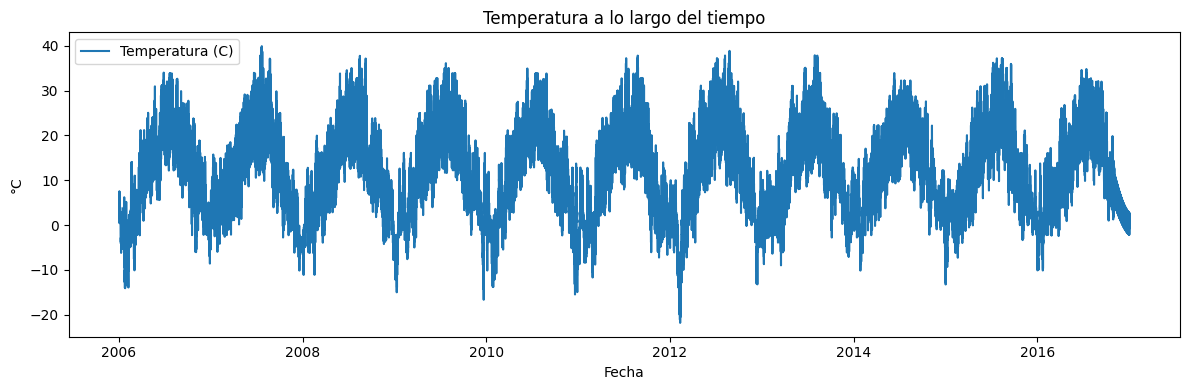

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['Temperature (C)'], label='Temperatura (C)')
plt.title('Temperatura a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('°C')
plt.legend()
plt.tight_layout()
plt.show()

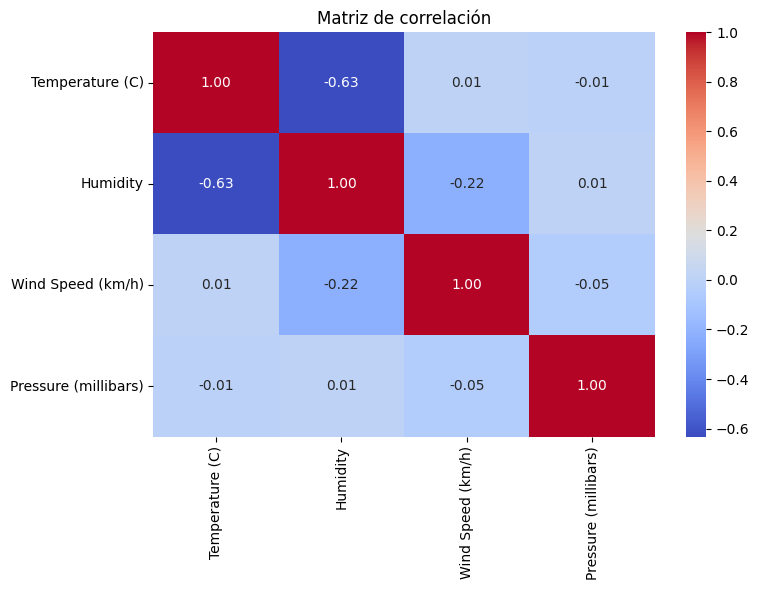

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

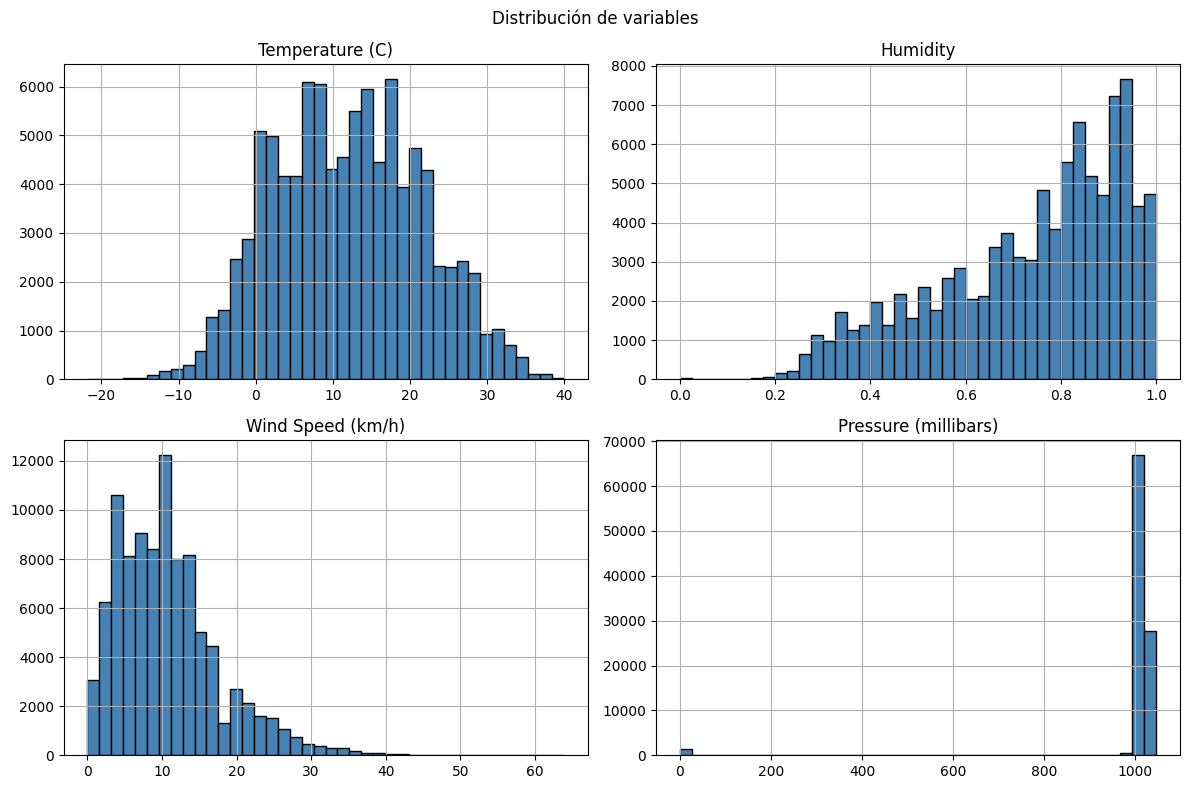

In [ ]:
df.hist(bins=40, figsize=(12, 8), color='steelblue', edgecolor='black')
plt.suptitle('Distribución de variables')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

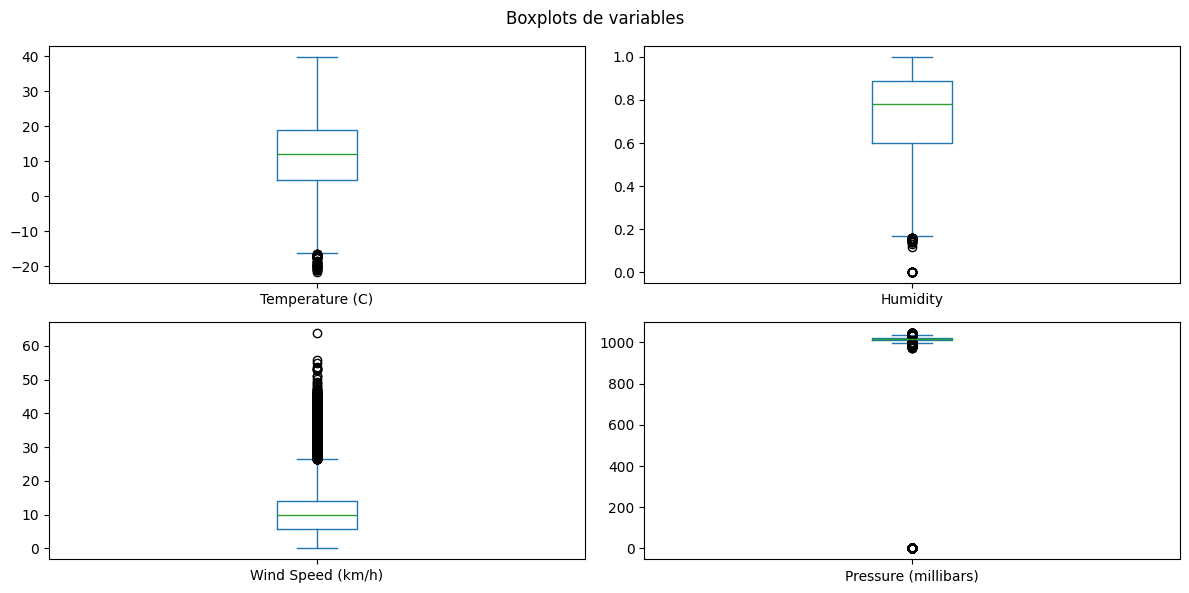

In [ ]:
plt.figure(figsize=(12, 6))
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12, 6))
plt.suptitle('Boxplots de variables')
plt.tight_layout()
plt.show()

In [ ]:
df = df[df['Pressure (millibars)'] > 300]

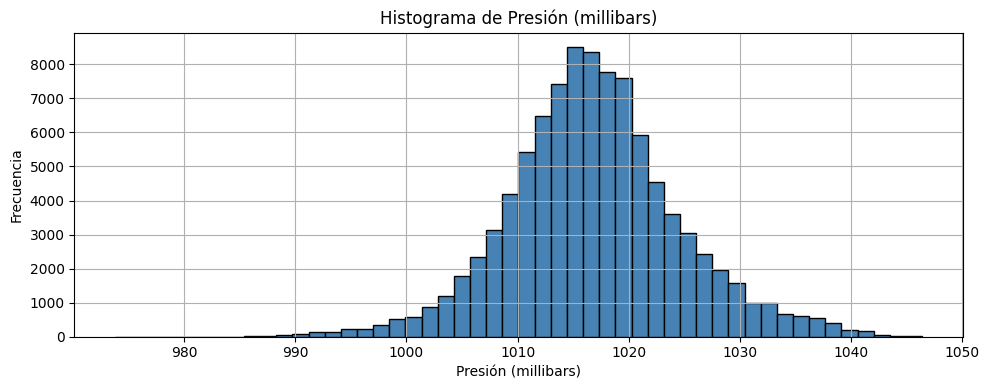

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Pressure (millibars)'], bins=50, color='steelblue', edgecolor='black')
plt.title('Histograma de Presión (millibars)')
plt.xlabel('Presión (millibars)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

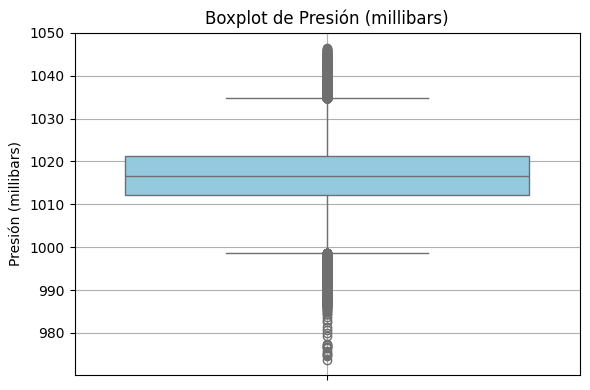

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Pressure (millibars)'], color='skyblue')
plt.title('Boxplot de Presión (millibars)')
plt.ylabel('Presión (millibars)')
plt.grid(True)
plt.tight_layout()
plt.show()

# SARIMAX

In [ ]:
ts = df['Temperature (C)']
ts = ts.sort_index()

In [ ]:
n = int(len(ts) * 0.8)
train, test = ts[:n], ts[n:]

In [ ]:
train_sample = train['2013-01-01':'2014-10-15']

In [ ]:
model_auto = auto_arima(train,
                        seasonal=True,
                        m=24,
                        trace=True,
                        suppress_warnings=True,
                        error_action='ignore',
                        stepwise=True,
                        max_order=15)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=347.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=273851.061, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print("Best order:", model_auto.order)
print("Best seasonal order:", model_auto.seasonal_order)

In [ ]:
model = SARIMAX(train_sample, order=(2,1,2), seasonal_order=(1,0,1,24), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred = results.get_prediction(start=len(train), end=len(train)+len(test)-1)
pred = pred.predicted_mean
pred.index = test.index

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
mse = mean_squared_error(test, pred)
mae = mean_absolute_error(test, pred)
r2 = r2_score(test, pred)

print(f"Evaluación:")
print(f"• MSE:  {mse:.3f}")
print(f"• MAE:  {mae:.3f}")
print(f"• R²:   {r2:.3f}")

Evaluación:
• MSE:  446.015
• MAE:  19.111
• R²:   -4.491


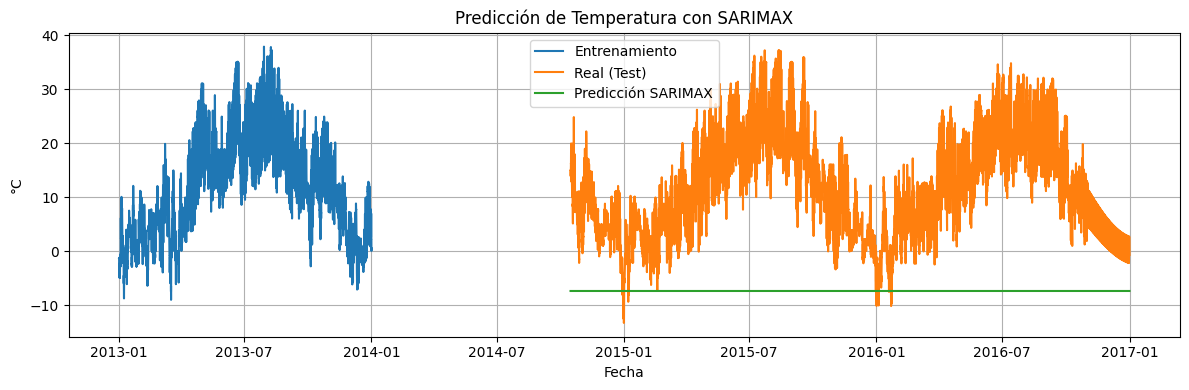

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(train_sample.index, train_sample, label='Entrenamiento')
plt.plot(test.index, test, label='Real (Test)')
plt.plot(pred.index, pred, label='Predicción SARIMAX')
plt.title('Predicción de Temperatura con SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('°C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()